In [73]:
# forked from ./Dropbox/Workbench/Jupyter/sage.ipynb 2/8/17
from __future__ import print_function

import phcpy
from phcpy.examples import binomials
from phcpy.solver import solve

# butcher's problem, http://homepages.math.uic.edu/~jan/PHCpack/node10.html 
ex = """ z*u+y*v+t*w-w**2-1/2*w-1/2;
 z*u**2+y*v**2-t*w**2+w**3+w**2-1/3*t+4/3*w;
 x*z*v-t*w**2+w**3-1/2*t*w+w**2-1/6*t+2/3*w;
 z*u**3+y*v**3+t*w**3-w**4-3/2*w**3+t*w-5/2*w**2-1/4*w-1/4;
 x*z*u*v+t*w**3-w**4+1/2*t*w**2-3/2*w**3+1/2*t*w-7/4*w**2-3/8*w-1/8;
 x*z*v**2+t*w**3-w**4+t*w**2-3/2*w**3+2/3*t*w-7/6*w**2-1/12*w-1/12;
 -t*w**3+w**4-t*w**2+3/2*w**3-1/3*t*w+13/12*w**2+7/24*w+1/24;""".splitlines()

# binomials()
N = 7 # TODO: infer # vars from example
# xs = ['x'+str(i+1) for i in range(N)]
xs = ['z', 'u', 'y', 'v', 't', 'w', 'x']

var(xs)
for eq in ex: print(eq)

 z*u+y*v+t*w-w**2-1/2*w-1/2;
 z*u**2+y*v**2-t*w**2+w**3+w**2-1/3*t+4/3*w;
 x*z*v-t*w**2+w**3-1/2*t*w+w**2-1/6*t+2/3*w;
 z*u**3+y*v**3+t*w**3-w**4-3/2*w**3+t*w-5/2*w**2-1/4*w-1/4;
 x*z*u*v+t*w**3-w**4+1/2*t*w**2-3/2*w**3+1/2*t*w-7/4*w**2-3/8*w-1/8;
 x*z*v**2+t*w**3-w**4+t*w**2-3/2*w**3+2/3*t*w-7/6*w**2-1/12*w-1/12;
 -t*w**3+w**4-t*w**2+3/2*w**3-1/3*t*w+13/12*w**2+7/24*w+1/24;


In [74]:
import re
import numpy as np

def parse(raw, N):
    # convert substrings of form =* {} : {} {}* =* to tuples
    r = re.compile('=*\s*(\S+)\s+:\s+(\S+)\s*(\S*)[\n=]')
    tups = [r.findall(sol) for sol in raw]

    def munge(tup):
        # TODO: check name of each real- or complex-valued variable
        return complex(float(tup[1]), float(tup[2])) if tup[2] \
                else float(tup[1])

    # http://stackoverflow.com/a/15579807
    forms = np.append(np.array(['complex_', 'int_']),
                      np.repeat(['complex_', 'float_'], [N, 3])).tolist()
    dtype = {'names': [tup[0] for tup in tups[0]],
             'formats': forms}
    
    dtype['names'][0] = 'dt'
    
    print(dtype)

    sols = np.zeros(len(tups), dtype=dtype)
    for i in range(len(tups)):
        sols[i] = tuple(munge(tup) for tup in tups[i])

    return sols

raw = solve(ex)
sols = parse(raw, N)

print(sols.dtype)
print(sols[0])

{'names': ['dt', 'm', 'z', 'u', 'y', 'v', 't', 'w', 'x', 'err', 'rco', 'res'], 'formats': ['complex_', 'int_', 'complex_', 'complex_', 'complex_', 'complex_', 'complex_', 'complex_', 'complex_', 'float_', 'float_', 'float_']}
[('dt', '<c16'), ('m', '<i8'), ('z', '<c16'), ('u', '<c16'), ('y', '<c16'), ('v', '<c16'), ('t', '<c16'), ('w', '<c16'), ('x', '<c16'), ('err', '<f8'), ('rco', '<f8'), ('res', '<f8')]
((1+17.4578841504454j), 1, (-0.0229379273840319+1.33523787049595e-96j), (0.816496580927768-5.59240870806592e-96j), (-0.045875854768073+3.01200037350705e-96j), (0.408248290463833-7.15052911986191e-97j), (-1+7.57800640420148e-98j), (-0.908248290463865-4.45947960582692e-96j), (0.816496580927856+4.18644277779741e-95j), 6.03e-13, 0.0001775, 1.229e-15)


In [75]:
# naiively evaluating the polynomials in sage introduces slight numeric error
print(xs)
loc = dict(zip(xs, sols[xs][0]))

for line in ex:
    eq = line[:-1] # drop trailing ;
    print('{0:30} {1}'.format( eq, abs( sage_eval(eq, locals=loc)) ))

['z', 'u', 'y', 'v', 't', 'w', 'x']
 z*u+y*v+t*w-w**2-1/2*w-1/2    1.66533453694e-16
 z*u**2+y*v**2-t*w**2+w**3+w**2-1/3*t+4/3*w 2.22044604925e-16
 x*z*v-t*w**2+w**3-1/2*t*w+w**2-1/6*t+2/3*w 2.22044604925e-16
 z*u**3+y*v**3+t*w**3-w**4-3/2*w**3+t*w-5/2*w**2-1/4*w-1/4 4.16333634234e-16
 x*z*u*v+t*w**3-w**4+1/2*t*w**2-3/2*w**3+1/2*t*w-7/4*w**2-3/8*w-1/8 3.88578058619e-16
 x*z*v**2+t*w**3-w**4+t*w**2-3/2*w**3+2/3*t*w-7/6*w**2-1/12*w-1/12 6.93889390391e-17
 -t*w**3+w**4-t*w**2+3/2*w**3-1/3*t*w+13/12*w**2+7/24*w+1/24 9.02056207508e-17


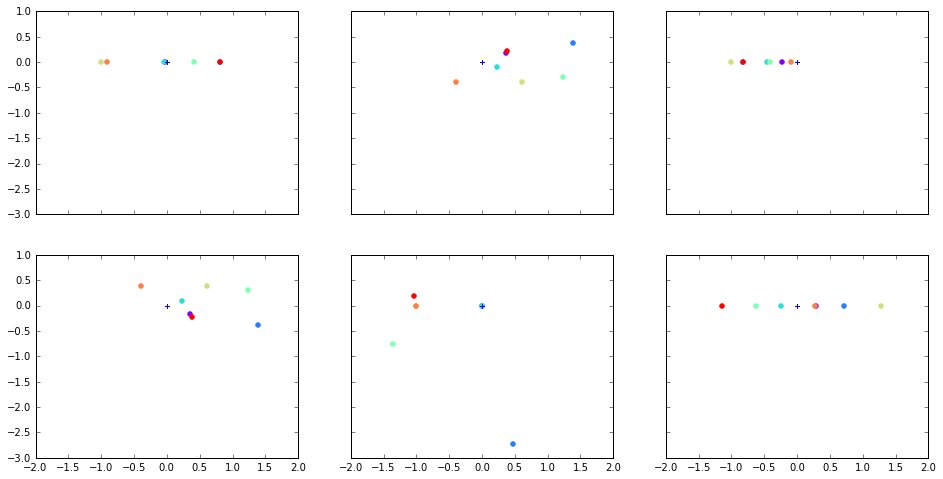

In [83]:
%matplotlib inline
import matplotlib.pyplot as mpl
import matplotlib.cm as cm
# from matplotlib.lines import Line2D # for mark in Line2D.filled_markers ...

# loc = [dict(zip(xs, x)) for x in sols[xs]]
sqrt_m = sqrt(len(sols))

colors = cm.rainbow(np.linspace(0, 1, N)) # stackoverflow 12236566
fig, axs = mpl.subplots(ncols=ceil(sqrt_m), nrows=floor(sqrt_m),
                        sharey=True, sharex=True, figsize=(16,8))

# plot each solution. TODO: encode axis redundantly by hue + brightness + shape
for col, cor in zip(colors, xs):
    for ax, sol in zip(axs.reshape(len(sols)), sols):
        
        # ax.axhline(color='.8'); ax.axvline(color='.8') # draw re/im axis
        ax.scatter(0, 0, marker = '+')
        ax.scatter(sol[cor].real, sol[cor].imag, color = col)

In [82]:
sols['rco'] # inverse condition number. TODO: filter out small.

array([  1.77500000e-04,   1.46100000e-03,   2.47700000e-03,
         1.46100000e-03,   2.47400000e-19,   1.37300000e-02])